In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Load and clean the data
df = pd.read_csv(r'C:\Users\baral\Desktop\stock_price_predictor\create_dataset\nepse_merged.csv', parse_dates=['Date'])

df
# # Remove commas from Volume and convert to float
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
# df['Volume']
# df
# # Sort by date ascending
# df = df.sort_values('Date').reset_index(drop=True)
# df

df['Close'] = df['Close'].apply(lambda x: float(str(x).replace(',', '')))
df['Close'].dtype

data = df[['Close']].values


In [19]:

# 3. Scale the data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.83808926],
       [0.84357547],
       [0.83486459],
       ...,
       [0.00545663],
       [0.00552895],
       [0.00553224]], shape=(6388, 1))

In [20]:
# 4. Create sequences (sliding window) for LSTM
timesteps = 60  # number of past days to look at
X, y = [], []
for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i - timesteps:i, 0])  # last 'timesteps' close values
    print(scaled_data[i])
    y.append(scaled_data[i, 0])               # next day close value
X = np.array(X)
y = np.array(y)
X.shape, y.shape

[0.80130302]
[0.80641121]
[0.81476709]
[0.82077925]
[0.81862947]
[0.81660459]
[0.80045823]
[0.79870619]
[0.79718425]
[0.79550781]
[0.80638163]
[0.81332733]
[0.81188099]
[0.80724286]
[0.79773977]
[0.80218725]
[0.81252198]
[0.81436606]
[0.81339307]
[0.83028233]
[0.84126791]
[0.82618328]
[0.82826404]
[0.83248799]
[0.84758577]
[0.85282545]
[0.86103669]
[0.85518232]
[0.84861464]
[0.85189848]
[0.85433753]
[0.84158019]
[0.83059461]
[0.8253878]
[0.82967421]
[0.83996621]
[0.83697492]
[0.85377543]
[0.85213844]
[0.8475529]
[0.85219761]
[0.85589563]
[0.84861464]
[0.82805366]
[0.82867493]
[0.82874724]
[0.83349057]
[0.81814297]
[0.80913295]
[0.81215382]
[0.81815283]
[0.82486515]
[0.81635477]
[0.83541682]
[0.85101424]
[0.85019904]
[0.83599207]
[0.82564091]
[0.82404665]
[0.83305338]
[0.82084499]
[0.80240749]
[0.81097703]
[0.77327368]
[0.75865912]
[0.76600913]
[0.7767942]
[0.7606281]
[0.78000243]
[0.79940306]
[0.79559328]
[0.79690813]
[0.81565461]
[0.83228419]
[0.80658872]
[0.81406036]
[0.81836321]
[0.

((6328, 60), (6328,))

In [21]:
# 4. Create sequences (sliding window) for LSTM
timesteps = 60  # number of past days to look at
X, y = [], []
for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i - timesteps:i])  # last 'timesteps' close values
    y.append(scaled_data[i, 0])               # next day close value
X = np.array(X)
y = np.array(y)
X,y 
X.shape

(6328, 60, 1)

In [22]:
# hehe

In [23]:

# Convert to PyTorch tensors
tensor_X = torch.from_numpy(X).float()
tensor_y = torch.from_numpy(y).float().view(-1, 1)

tensor_X.shape, tensor_y.shape

(torch.Size([6328, 60, 1]), torch.Size([6328, 1]))

In [24]:
# hehe

In [25]:

# 5. Split into training and testing sets
train_size = int(len(tensor_X) * 0.2)
train_X, test_X = tensor_X[train_size:], tensor_X[:train_size]
train_y, test_y = tensor_y[train_size:], tensor_y[:train_size]

train_X


tensor([[[0.3309],
         [0.3321],
         [0.3328],
         ...,
         [0.3628],
         [0.3609],
         [0.3642]],

        [[0.3321],
         [0.3328],
         [0.3360],
         ...,
         [0.3609],
         [0.3642],
         [0.3623]],

        [[0.3328],
         [0.3360],
         [0.3401],
         ...,
         [0.3642],
         [0.3623],
         [0.3623]],

        ...,

        [[0.0056],
         [0.0056],
         [0.0051],
         ...,
         [0.0055],
         [0.0053],
         [0.0055]],

        [[0.0056],
         [0.0051],
         [0.0054],
         ...,
         [0.0053],
         [0.0055],
         [0.0055]],

        [[0.0051],
         [0.0054],
         [0.0047],
         ...,
         [0.0055],
         [0.0055],
         [0.0055]]])

In [26]:
train_y.shape

torch.Size([5063, 1])

In [27]:
df['Date']

0      2025-04-20
1      2025-04-17
2      2025-04-16
3      2025-04-15
4      2025-04-13
          ...    
6383   1997-07-24
6384   1997-07-23
6385   1997-07-22
6386   1997-07-21
6387   1997-07-20
Name: Date, Length: 6388, dtype: datetime64[ns]

Epoch 1/20, Loss: 0.007503
Epoch 2/20, Loss: 0.000112
Epoch 3/20, Loss: 0.000096
Epoch 4/20, Loss: 0.000096
Epoch 5/20, Loss: 0.000084
Epoch 6/20, Loss: 0.000080
Epoch 7/20, Loss: 0.000073
Epoch 8/20, Loss: 0.000074
Epoch 9/20, Loss: 0.000065
Epoch 10/20, Loss: 0.000063
Epoch 11/20, Loss: 0.000062
Epoch 12/20, Loss: 0.000059
Epoch 13/20, Loss: 0.000049
Epoch 14/20, Loss: 0.000052
Epoch 15/20, Loss: 0.000047
Epoch 16/20, Loss: 0.000042
Epoch 17/20, Loss: 0.000053
Epoch 18/20, Loss: 0.000042
Epoch 19/20, Loss: 0.000043
Epoch 20/20, Loss: 0.000039


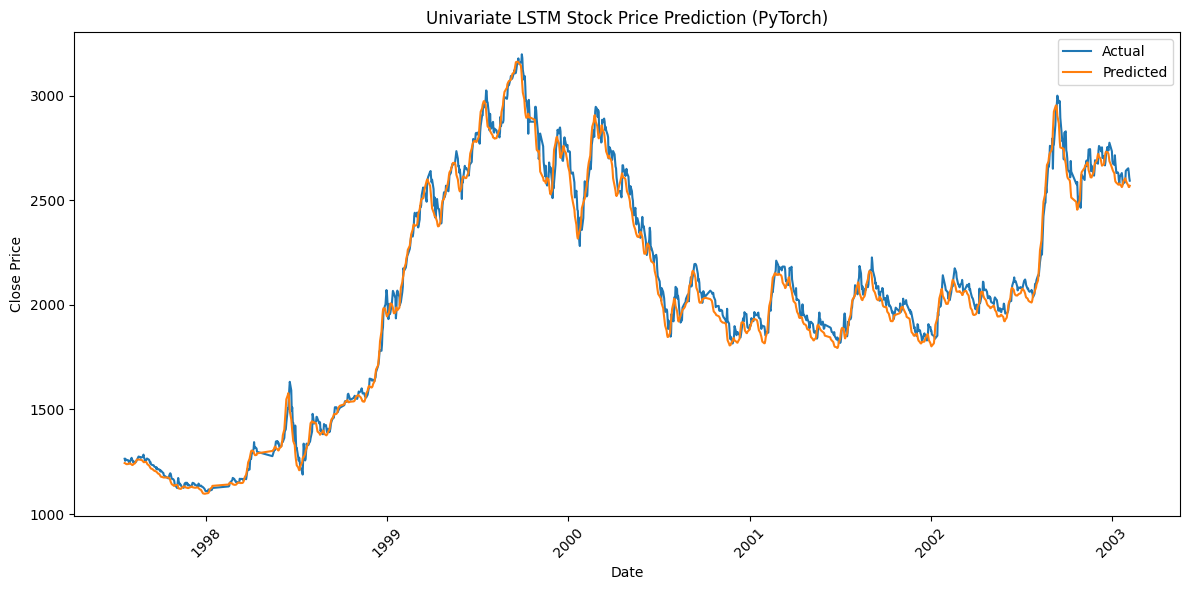

In [28]:


# Create DataLoader
batch_size = 32
dataset = TensorDataset(train_X, train_y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 6. Define the LSTM model
class StockLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch, seq_len, hidden_size)
        out = out[:, -1, :]              # take the last time step
        out = self.fc(out)
        return out

model = StockLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. Train the model
epochs = 20
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(dataloader):.6f}")

# 8. Evaluate on test set
model.eval()
with torch.no_grad():
    predictions = model(test_X).numpy()

# Invert scaling
y_test_actual = scaler.inverse_transform(test_y.numpy())
predictions_actual = scaler.inverse_transform(predictions)

# 9. Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
test_dates = df['Date'].iloc[-len(test_y):]
plt.plot(test_dates, y_test_actual, label='Actual')
plt.plot(test_dates, predictions_actual, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Univariate LSTM Stock Price Prediction (PyTorch)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/30  Loss: 0.008542
Epoch 2/30  Loss: 0.000494
Epoch 3/30  Loss: 0.000467
Epoch 4/30  Loss: 0.000428
Epoch 5/30  Loss: 0.000413
Epoch 6/30  Loss: 0.000418
Epoch 7/30  Loss: 0.000382
Epoch 8/30  Loss: 0.000370
Epoch 9/30  Loss: 0.000366
Epoch 10/30  Loss: 0.000345
Epoch 11/30  Loss: 0.000353
Epoch 12/30  Loss: 0.000322
Epoch 13/30  Loss: 0.000352
Epoch 14/30  Loss: 0.000336
Epoch 15/30  Loss: 0.000328
Epoch 16/30  Loss: 0.000327
Epoch 17/30  Loss: 0.000320
Epoch 18/30  Loss: 0.000319
Epoch 19/30  Loss: 0.000323
Epoch 20/30  Loss: 0.000306
Epoch 21/30  Loss: 0.000325
Epoch 22/30  Loss: 0.000302
Epoch 23/30  Loss: 0.000321
Epoch 24/30  Loss: 0.000306
Epoch 25/30  Loss: 0.000300
Epoch 26/30  Loss: 0.000295
Epoch 27/30  Loss: 0.000315
Epoch 28/30  Loss: 0.000309
Epoch 29/30  Loss: 0.000304
Epoch 30/30  Loss: 0.000290


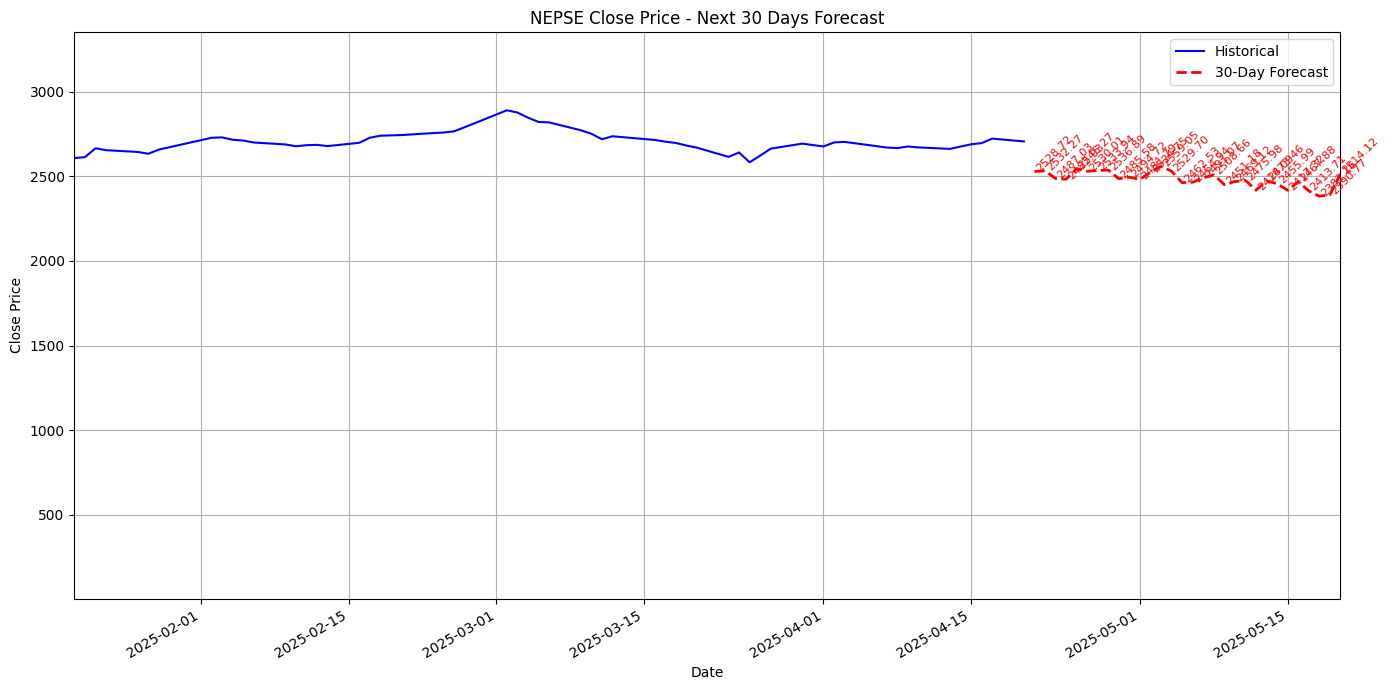


--- 30-Day Forecasted Prices ---
2025-04-21: 2528.72
2025-04-22: 2532.27
2025-04-23: 2487.03
2025-04-24: 2482.93
2025-04-25: 2545.27
2025-04-26: 2530.01
2025-04-27: 2533.94
2025-04-28: 2536.89
2025-04-29: 2485.58
2025-04-30: 2494.72
2025-05-01: 2481.79
2025-05-02: 2524.75
2025-05-03: 2559.05
2025-05-04: 2529.70
2025-05-05: 2462.53
2025-05-06: 2464.94
2025-05-07: 2491.07
2025-05-08: 2508.66
2025-05-09: 2451.18
2025-05-10: 2469.12
2025-05-11: 2475.98
2025-05-12: 2418.09
2025-05-13: 2473.46
2025-05-14: 2455.99
2025-05-15: 2417.32
2025-05-16: 2467.88
2025-05-17: 2413.71
2025-05-18: 2382.16
2025-05-19: 2390.77
2025-05-20: 2514.12


In [38]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt

# # 1. Load & clean
# df = pd.read_csv(r'C:\Users\baral\Desktop\stock_price_predictor\create_dataset\nepse_merged.csv', parse_dates=['Date'])
# df['Close'] = df['Close'].apply(lambda x: float(str(x).replace(',', '')))
# df = df.sort_values('Date').reset_index(drop=True)

# # 2. Scale
# scaler = MinMaxScaler((0,1))
# data = scaler.fit_transform(df[['Close']].values)  # shape (N,1)

# # 3. Build sequences for multi-step forecasting
# lookback = 60     # past days
# horizon  = 30     # days to predict
# X, y = [], []
# for i in range(lookback, len(data) - horizon + 1):
#     X.append(data[i - lookback : i, 0:1])     # (60,1)
#     y.append(data[i : i + horizon, 0])        # (30,)
# X = np.stack(X)  # (samples, 60, 1)
# y = np.stack(y)  # (samples, 30)

# # 4. Train/test split
# split = int(len(X) * 0.8)
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# # 5. To PyTorch
# tensor_X_train = torch.tensor(X_train, dtype=torch.float32)
# tensor_y_train = torch.tensor(y_train, dtype=torch.float32)
# tensor_X_test  = torch.tensor(X_test,  dtype=torch.float32)
# tensor_y_test  = torch.tensor(y_test,  dtype=torch.float32)

# train_ds = TensorDataset(tensor_X_train, tensor_y_train)
# train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# # 6. Model
# class MultiStepLSTM(nn.Module):
#     def __init__(self, in_feats=1, hidden=50, layers=2, out_steps=30):
#         super().__init__()
#         self.lstm = nn.LSTM(in_feats, hidden, layers, batch_first=True)
#         self.fc   = nn.Linear(hidden, out_steps)
#     def forward(self, x):
#         out, _ = self.lstm(x)         # out: (B, T, hidden)
#         last   = out[:, -1, :]        # (B, hidden)
#         return self.fc(last)          # (B, 30)

# model = MultiStepLSTM(out_steps=horizon)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# # 7. Train
# epochs = 30
# for ep in range(1, epochs+1):
#     model.train()
#     total_loss = 0
#     for bx, by in train_loader:
#         optimizer.zero_grad()
#         pred = model(bx)           # (batch, 30)
#         loss = criterion(pred, by)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     print(f"Epoch {ep}/{epochs}  Loss: {total_loss/len(train_loader):.6f}")

# # 8. Predict next 30 days from the latest data
# model.eval()
# with torch.no_grad():
#     # take last 60 days from full dataset
#     recent = torch.tensor(data[-lookback:], dtype=torch.float32).unsqueeze(0)  # (1,60,1)
#     future_scaled = model(recent).numpy().reshape(-1,1)  # (30,1)
#     future = scaler.inverse_transform(future_scaled)

# # 9. Plot predicted month ahead
# future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1),
#                              periods=horizon, freq='B')  # business days
# plt.figure(figsize=(10,4))
# plt.plot(df['Date'].iloc[-100:], df['Close'].iloc[-100:], label='Historical')
# plt.plot(future_dates, future, 'r--', label='30-Day Forecast')
# plt.xticks(rotation=45)
# plt.legend()
# plt.title('NEPSE Close Price — Next 30 Days Forecast')
# plt.show()

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Load and Clean Data
df = pd.read_csv(r'C:\Users\baral\Desktop\stock_price_predictor\create_dataset\nepse_merged.csv', parse_dates=['Date'])
df['Close'] = df['Close'].apply(lambda x: float(str(x).replace(',', '')))
df = df.sort_values('Date', ascending=True).reset_index(drop=True)

# 2. Scale Data
scaler = MinMaxScaler((0, 1))
data = scaler.fit_transform(df[['Close']].values)

# 3. Build Sequences
lookback = 60
horizon = 30
X, y = [], []
for i in range(lookback, len(data) - horizon + 1):
    X.append(data[i - lookback:i, 0:1])
    y.append(data[i:i + horizon, 0])
X = np.stack(X)
y = np.stack(y)

# 4. Train/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Convert to Tensors
tensor_X_train = torch.tensor(X_train, dtype=torch.float32)
tensor_y_train = torch.tensor(y_train, dtype=torch.float32)
tensor_X_test = torch.tensor(X_test, dtype=torch.float32)
tensor_y_test = torch.tensor(y_test, dtype=torch.float32)
train_ds = TensorDataset(tensor_X_train, tensor_y_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# 6. LSTM Model
class MultiStepLSTM(nn.Module):
    def __init__(self, in_feats=1, hidden=50, layers=2, out_steps=30):
        super().__init__()
        self.lstm = nn.LSTM(in_feats, hidden, layers, batch_first=True)
        self.fc = nn.Linear(hidden, out_steps)

    def forward(self, x):
        out, _ = self.lstm(x)
        last = out[:, -1, :]
        return self.fc(last)

model = MultiStepLSTM(out_steps=horizon)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 7. Training
epochs = 30
for ep in range(1, epochs + 1):
    model.train()
    total_loss = 0
    for bx, by in train_loader:
        optimizer.zero_grad()
        pred = model(bx)
        loss = criterion(pred, by)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {ep}/{epochs}  Loss: {total_loss/len(train_loader):.6f}")

# 8. Predict Next 30 Days
model.eval()
with torch.no_grad():
    recent = torch.tensor(data[-lookback:], dtype=torch.float32).unsqueeze(0)  # (1, 60, 1)
    future_scaled = model(recent).numpy().reshape(-1, 1)
    future = scaler.inverse_transform(future_scaled)

# 9. Generate Future Dates
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=horizon, freq='D')

# 10. Plot + Show Forecasted Values
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical', color='blue')
plt.plot(future_dates, future.flatten(), label='30-Day Forecast', color='red', linestyle='--', linewidth=2)
for i, val in enumerate(future.flatten()):
    plt.text(future_dates[i], val, f'{val:.2f}', fontsize=8, color='red', rotation=45)

start_date = max(df['Date'].min(), last_date - pd.Timedelta(days=90))
end_date = future_dates[-1]
plt.xlim(start_date, end_date)
plt.title('NEPSE Close Price - Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# 11. Print forecasted values with dates
print("\n--- 30-Day Forecasted Prices ---")
for date, price in zip(future_dates, future.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")


In [49]:
df[-1:]

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
6387,NEPSE,2025-04-20,2724.51,2731.81,2700.85,2706.04,-0.61,"8,433,589,785.29"


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Load & clean
df = pd.read_csv(
    r'C:\Users\baral\Desktop\stock_price_predictor\create_dataset\nepse_merged.csv',
    parse_dates=['Date']
)
# Remove commas and cast to float
for col in ['Open','High','Low','Close']:
    df[col] = df[col].apply(lambda x: float(str(x).replace(',', '')))
# Sort oldest → newest
df = df.sort_values('Date', ascending=True).reset_index(drop=True)
df = df.drop(columns=['Volume','Percent Change'])

In [38]:
df.dtypes

Symbol            object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
dtype: object

Epoch 1/30  Loss: 0.006018
Epoch 2/30  Loss: 0.000427
Epoch 3/30  Loss: 0.000399
Epoch 4/30  Loss: 0.000356
Epoch 5/30  Loss: 0.000337
Epoch 6/30  Loss: 0.000332
Epoch 7/30  Loss: 0.000335
Epoch 8/30  Loss: 0.000338
Epoch 9/30  Loss: 0.000343
Epoch 10/30  Loss: 0.000319
Epoch 11/30  Loss: 0.000315
Epoch 12/30  Loss: 0.000303
Epoch 13/30  Loss: 0.000308
Epoch 14/30  Loss: 0.000307
Epoch 15/30  Loss: 0.000319
Epoch 16/30  Loss: 0.000308
Epoch 17/30  Loss: 0.000306
Epoch 18/30  Loss: 0.000297
Epoch 19/30  Loss: 0.000293
Epoch 20/30  Loss: 0.000301
Epoch 21/30  Loss: 0.000304
Epoch 22/30  Loss: 0.000288
Epoch 23/30  Loss: 0.000289
Epoch 24/30  Loss: 0.000292
Epoch 25/30  Loss: 0.000281
Epoch 26/30  Loss: 0.000273
Epoch 27/30  Loss: 0.000281
Epoch 28/30  Loss: 0.000277
Epoch 29/30  Loss: 0.000274
Epoch 30/30  Loss: 0.000292


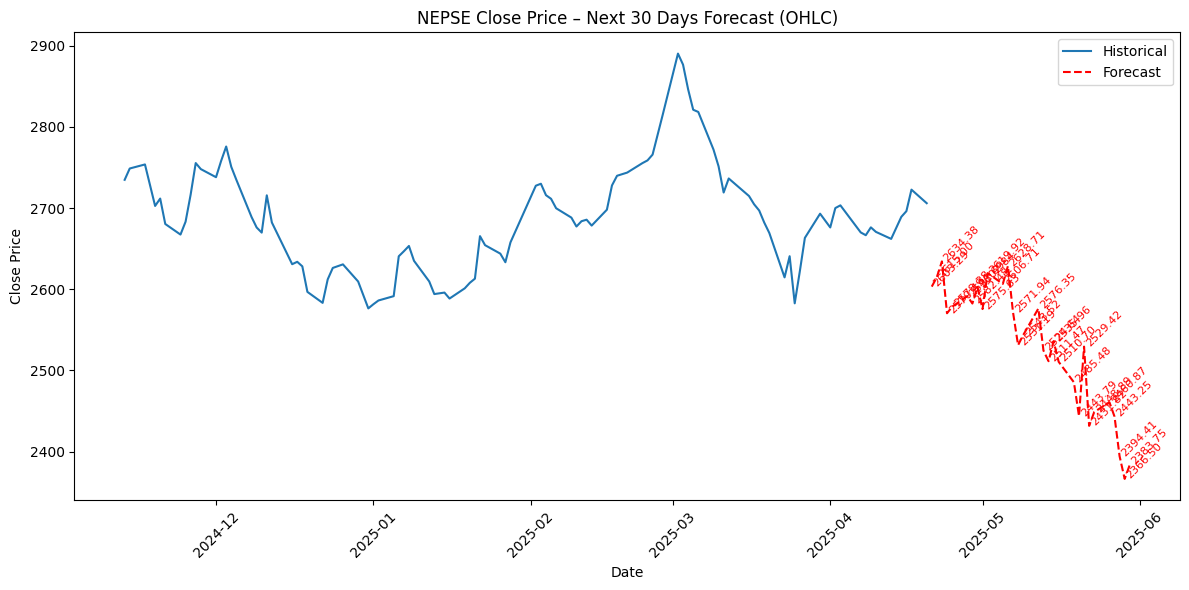


--- 30-Day Forecasted Close Prices ---
2025-04-21: 2603.29
2025-04-22: 2615.00
2025-04-23: 2634.38
2025-04-24: 2570.49
2025-04-25: 2578.38
2025-04-28: 2591.69
2025-04-29: 2582.48
2025-04-30: 2602.84
2025-05-01: 2575.63
2025-05-02: 2619.92
2025-05-05: 2606.71
2025-05-06: 2628.71
2025-05-07: 2571.94
2025-05-08: 2531.19
2025-05-09: 2543.52
2025-05-12: 2576.35
2025-05-13: 2524.64
2025-05-14: 2511.47
2025-05-15: 2535.96
2025-05-16: 2510.70
2025-05-19: 2485.48
2025-05-20: 2443.79
2025-05-21: 2529.42
2025-05-22: 2431.82
2025-05-23: 2448.89
2025-05-26: 2460.87
2025-05-27: 2443.25
2025-05-28: 2394.41
2025-05-29: 2366.50
2025-05-30: 2383.75


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Load & clean
df = pd.read_csv(
    r'C:\Users\baral\Desktop\stock_price_predictor\create_dataset\nepse_merged.csv',
    parse_dates=['Date']
)
# Remove commas and cast to float
for col in ['Open','High','Low','Close']:
    df[col] = df[col].apply(lambda x: float(str(x).replace(',', '')))
# Sort oldest → newest
df = df.sort_values('Date', ascending=True).reset_index(drop=True)

# 2. Scale OHLC
scaler = MinMaxScaler((0,1))
features = ['Open','High','Low','Close']
data = scaler.fit_transform(df[features].values)  # shape: (N,4)

# 3. Build sequences
lookback = 60
horizon  = 30
X, y = [], []
for i in range(lookback, len(data) - horizon + 1):
    X.append(data[i-lookback:i, :])        # (60,4)
    # target is next 30 days of Close (col index 3)
    y.append(data[i:i+horizon, 3])         # (30,)
X = np.stack(X)  # (samples, 60, 4)
y = np.stack(y)  # (samples, 30)

# 4. Split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Tensors & loader
tX = torch.tensor(X_train, dtype=torch.float32)
ty = torch.tensor(y_train, dtype=torch.float32)
train_ds = TensorDataset(tX, ty)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# 6. Model
class MultiStepLSTM(nn.Module):
    def __init__(self, in_feats=4, hidden=64, layers=2, out_steps=30):
        super().__init__()
        self.lstm = nn.LSTM(in_feats, hidden, layers, batch_first=True)
        self.fc   = nn.Linear(hidden, out_steps)
    def forward(self, x):
        out, _ = self.lstm(x)        # (B, T, hidden)
        last   = out[:, -1, :]       # (B, hidden)
        return self.fc(last)         # (B, 30)

model     = MultiStepLSTM(in_feats=4, hidden=64, layers=2, out_steps=horizon)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 7. Train
epochs = 30
for ep in range(1, epochs+1):
    model.train()
    total_loss = 0
    for bx, by in train_loader:
        optimizer.zero_grad()
        pred = model(bx)           # (batch, 30)
        loss = criterion(pred, by)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {ep}/{epochs}  Loss: {total_loss/len(train_loader):.6f}")

# 8. Forecast next 30 days
model.eval()
with torch.no_grad():
    recent      = torch.tensor(data[-lookback:], dtype=torch.float32).unsqueeze(0)  # (1,60,4)
    scaled_pred = model(recent).numpy().reshape(-1,1)                               # (30,1)
    # we need to invert only the Close channel:
    dummy       = np.zeros((horizon, 4))
    dummy[:,3]  = scaled_pred[:,0]
    inv         = scaler.inverse_transform(dummy)
    future      = inv[:,3].reshape(-1,1)  # (30,1)

# 9. Future dates
last_date    = df['Date'].iloc[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1),
                             periods=horizon, freq='B')

# 10. Plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'].iloc[-100:], df['Close'].iloc[-100:], label='Historical')
plt.plot(future_dates, future.flatten(), 'r--', label='Forecast')
for dt, val in zip(future_dates, future.flatten()):
    plt.text(dt, val, f"{val:.2f}", fontsize=8, rotation=45, color='red')
plt.title('NEPSE Close Price – Next 30 Days Forecast (OHLC)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.legend(); plt.xticks(rotation=45); plt.tight_layout()
plt.show()

# 11. Print values
print("\n--- 30-Day Forecasted Close Prices ---")
for dt, val in zip(future_dates, future.flatten()):
    print(f"{dt.strftime('%Y-%m-%d')}: {val:.2f}")


### Code that takes only the upto data upto 2016

In [10]:
import pandas as pd

# 1) Read CSV, letting pandas infer the header and parse dates
df = pd.read_csv(
    'nepse_merged.csv',
    header=0,                   # first line is column names
    parse_dates=['Date'],       # parse Date into datetime
    dayfirst=False,             # adjust if your dates are D/M/Y
)

# 2) Keep only rows *after* 2016-05-29
df = df[df['Date'] > pd.Timestamp('2016-05-29')].reset_index(drop=True)

# 3) Now you can safely strip commas and convert to float
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    # ensure it's str, remove commas, then float
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# 4) Verify
print(df.head())
print(df['Date'].min(), '→', df['Date'].max())



  Symbol       Date     Open     High      Low    Close  Percent Change  \
0  NEPSE 2025-04-20  2724.51  2731.81  2700.85  2706.04           -0.61   
1  NEPSE 2025-04-17  2701.23  2740.13  2697.63  2722.73            0.98   
2  NEPSE 2025-04-16  2702.46  2704.97  2685.36  2696.23            0.26   
3  NEPSE 2025-04-15  2678.52  2704.58  2669.22  2689.22            1.01   
4  NEPSE 2025-04-13  2673.01  2676.70  2657.32  2662.08           -0.32   

         Volume  
0  8.433590e+09  
1  1.079736e+10  
2  7.265122e+09  
3  8.544358e+09  
4  6.280296e+09  
2016-05-30 00:00:00 → 2025-04-20 00:00:00


this is predicted tensor([[[ 0.0637,  0.0254, -0.0676, -0.0680, -0.0275,  0.0925],
         [ 0.0563, -0.0162,  0.0122,  0.0423, -0.0286,  0.0290],
         [ 0.0275, -0.0063, -0.0580, -0.1146, -0.0195,  0.0205],
         ...,
         [ 0.0415,  0.0347,  0.0008, -0.0359, -0.0616,  0.0593],
         [ 0.0858, -0.0564, -0.0967,  0.0195,  0.0683, -0.0350],
         [-0.0321, -0.0076,  0.0230, -0.0644,  0.0943,  0.0194]],

        [[ 0.0701,  0.0234, -0.0675, -0.0700, -0.0307,  0.0958],
         [ 0.0535, -0.0142,  0.0142,  0.0446, -0.0287,  0.0216],
         [ 0.0253, -0.0051, -0.0527, -0.1092, -0.0207,  0.0147],
         ...,
         [ 0.0436,  0.0295,  0.0037, -0.0341, -0.0562,  0.0661],
         [ 0.0854, -0.0612, -0.0875,  0.0177,  0.0726, -0.0316],
         [-0.0260, -0.0114,  0.0268, -0.0598,  0.0943,  0.0139]],

        [[ 0.0686,  0.0233, -0.0656, -0.0657, -0.0297,  0.0933],
         [ 0.0534, -0.0179,  0.0114,  0.0397, -0.0297,  0.0263],
         [ 0.0277,  0.0004, -0.0557, -0.

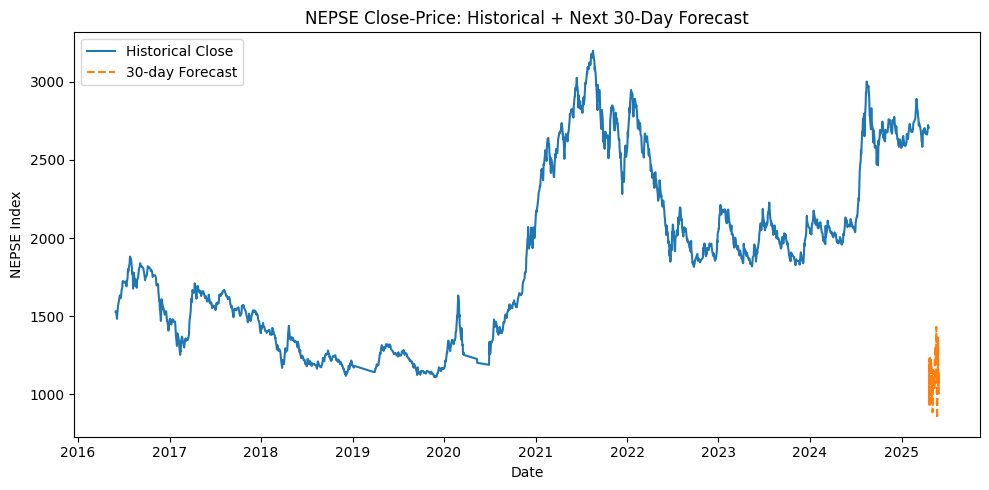

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1) Load & filter
df = pd.read_csv(
    'nepse_merged.csv',
    header=0,
    parse_dates=['Date']
)
df = df[df['Date'] > pd.Timestamp('2016-05-29')] \
       .sort_values('Date').reset_index(drop=True)

# 2) Clean numeric columns
num_cols = ['Open','High','Low','Close','Percent Change','Volume']
for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# 3) Scale features
data = df[num_cols].values                # (N,6)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


# 4) Create sliding windows: 60 in → 30 out
SEQ_IN, SEQ_OUT = 90, 30
X, y = [], []
for i in range(len(data_scaled) - SEQ_IN - SEQ_OUT + 1):
    X.append(data_scaled[i : i+SEQ_IN])
    y.append(data_scaled[i+SEQ_IN : i+SEQ_IN+SEQ_OUT])
X = np.stack(X)                           # (samples,60,6)
y = np.stack(y)                           # (samples,30,6)

# 5) Train/val split
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val,   y_val   = X[train_size:],  y[train_size:]

# 6) To torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
X_val   = torch.from_numpy(X_val).float().to(device)
y_val   = torch.from_numpy(y_val).float().to(device)

# 7) Seq2Seq LSTM with Attention
class Seq2SeqLSTMAttn(nn.Module):
    def __init__(self, in_feats, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.in_feats   = in_feats

        # Encoder LSTM
        self.lstm = nn.LSTM(in_feats, hidden_size,
                            num_layers,
                            dropout=dropout,
                            batch_first=True)
        # Decoder: will take [last_hidden; context] of size 2*hidden_size
        self.decoder = nn.Linear(hidden_size * 2,
                                 SEQ_OUT * in_feats)

    def forward(self, x):
        # x: (batch, SEQ_IN, in_feats)
        out, _ = self.lstm(x)               # out: (batch, SEQ_IN, hidden_size)
        last = out[:, -1, :]                # (batch, hidden_size)

        # --- Attention over time-steps ---
        # Compute scores: dot(last, out_i) for each time i
        # out * last.unsqueeze(1) -> (batch, SEQ_IN, hidden_size)
        attn_scores = (out * last.unsqueeze(1)).sum(dim=2)       # (batch, SEQ_IN)
        attn_weights = F.softmax(attn_scores, dim=1).unsqueeze(2)  # (batch, SEQ_IN,1)

        # Context = weighted sum of encoder outputs
        context = (attn_weights * out).sum(dim=1)                # (batch, hidden_size)

        # Concatenate last hidden state + context
        combined = torch.cat([last, context], dim=1)            # (batch, 2*hidden_size)

        # Decode to full output window
        dec = self.decoder(combined)                            # (batch, SEQ_OUT*in_feats)
        dec = dec.view(-1, SEQ_OUT, self.in_feats)              # (batch, SEQ_OUT, in_feats)
        return dec

model     = Seq2SeqLSTMAttn(len(num_cols)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

target_idx = [
    num_cols.index('Close'),
    num_cols.index('Percent Change'),
    num_cols.index('Volume')
]

# 8) Training loop
EPOCHS = 100
for epoch in range(1, EPOCHS+1):
    model.train()
    pred = model(X_train)
    print("this is predicted", pred)
    loss = criterion(pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:2d}/{EPOCHS} — train_loss: {loss.item():.6f}, val_loss: {val_loss.item():.6f}")

# 9) Forecast the *next* 30 days
model.eval()
with torch.no_grad():
    last_window = torch.from_numpy(data_scaled[-SEQ_IN:]) \
                       .unsqueeze(0).float().to(device)  # (1,60,6)
    fut_scaled = model(last_window).squeeze(0)            # (30,6)

fut = scaler.inverse_transform(fut_scaled.cpu().numpy())
pred_closes = fut[:, num_cols.index('Close')]

# 10) Build future dates (business days)
future_dates = pd.date_range(
    start = df['Date'].iloc[-1] + pd.Timedelta(days=1),
    periods = SEQ_OUT,
    freq    = 'B'
)

# 11) Print results
print("\nNext 30 business days predicted Close prices:")
for d, p in zip(future_dates, pred_closes):
    print(f"{d.strftime('%Y-%m-%d')}: {p:.2f}")

# 12) Plot historical + forecast
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Historical Close')
plt.plot(future_dates, pred_closes, '--', label='30-day Forecast')
plt.xlabel('Date')
plt.ylabel('NEPSE Index')
plt.title('NEPSE Close-Price: Historical + Next 30-Day Forecast')
plt.legend()
plt.tight_layout()
plt.show()


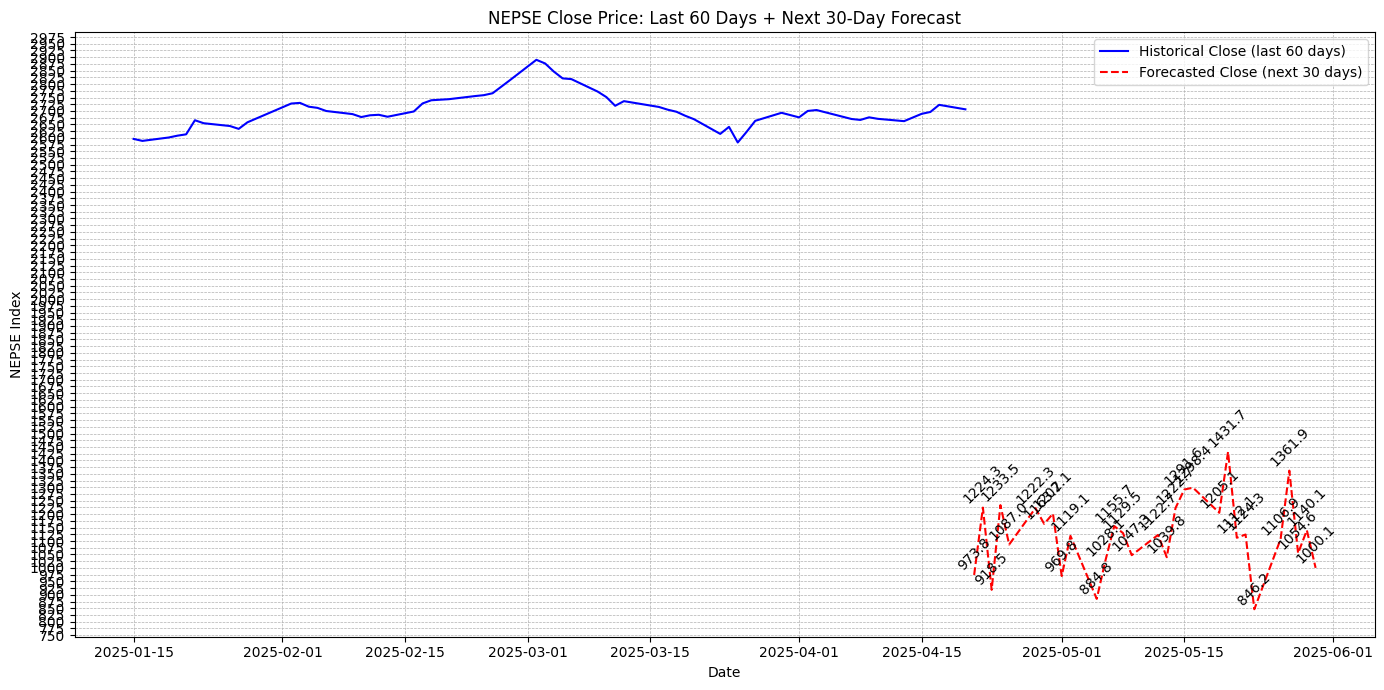

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 12) Plot historical + forecast (zoomed view with finer grid and value labels)

plt.figure(figsize=(14,7))

# Select last 60 days of actual data
zoom_days = 60
recent_dates = df['Date'].iloc[-zoom_days:]
recent_closes = df['Close'].iloc[-zoom_days:]

# Plot historical close
plt.plot(recent_dates, recent_closes, label='Historical Close (last 60 days)', color='blue')

# Plot forecasted future close
plt.plot(future_dates, pred_closes, '--', label='Forecasted Close (next 30 days)', color='red')

# Add value labels on forecasted points
for i, (date, value) in enumerate(zip(future_dates, pred_closes)):
    plt.text(date, value + 5, f'{value:.1f}', ha='center', va='bottom', fontsize=10, color='black', rotation=45)

# Labels and title
plt.xlabel('Date')
plt.ylabel('NEPSE Index')
plt.title('NEPSE Close Price: Last 60 Days + Next 30-Day Forecast')

# Customize Y-axis grid to every 25 points
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
fut

array([[2.6371101e+03, 2.7025469e+03, 2.5533884e+03, 2.5994565e+03,
        1.7049843e+00, 6.5747267e+09],
       [2.6952136e+03, 2.5075071e+03, 2.6009180e+03, 2.6205330e+03,
        2.3411548e+00, 8.0822518e+09],
       [2.6885464e+03, 2.7202754e+03, 2.6022451e+03, 2.6939712e+03,
        1.1086619e+00, 6.9668726e+09],
       [2.6105176e+03, 2.6642717e+03, 2.6321025e+03, 2.5974119e+03,
        1.0206273e+00, 6.2334218e+09],
       [2.7223516e+03, 2.7405476e+03, 2.5776851e+03, 2.6730962e+03,
        2.3368418e+00, 6.1400837e+09],
       [2.7326448e+03, 2.7887539e+03, 2.6708604e+03, 2.8079287e+03,
        1.1745601e+00, 5.6885545e+09],
       [2.6838477e+03, 2.5321057e+03, 2.4636091e+03, 2.6391948e+03,
        1.0923291e+00, 5.1723361e+09],
       [2.6215022e+03, 2.6660610e+03, 2.5657166e+03, 2.7424570e+03,
        1.0061049e+00, 7.0221215e+09],
       [2.7205256e+03, 2.5218503e+03, 2.5359373e+03, 2.4451792e+03,
        1.0306422e+00, 6.2520637e+09],
       [2.7865696e+03, 2.6849060e+03,

In [32]:
X[0].shape

(30, 6)

In [35]:
y[0].shape

(30, 6)

In [37]:
data_scaled.shape

(2051, 6)